In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
hb = pd.read_csv('E:/applied ai/eda/haberman.csv')

This is a cancer survival dataset. people suffered with cancer during 60's and we are going to analyse their survival status. 
the status column is categorical and gives outcomes with people survived after treatment with class '1' and people didn't survived with class '2'.

In [50]:
print(hb.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [51]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


there are 4 columns with no null values.
all columns are of dtype integer.

In [52]:
hb.shape

(306, 4)

it contains 306 rows and 4 columns

In [53]:
hb.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


nodes columns has 50% percentile and max with large difference implying it has outliers

In [54]:
hb.status.value_counts()

1    225
2     81
Name: status, dtype: int64

status columns with class 1 has 225 values and class 2 has 81 values 

# univariate analysis 
for feature year

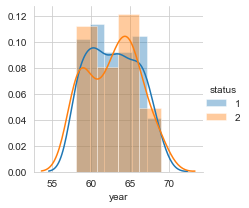

In [55]:
sns.FacetGrid(hb, hue='status').map(sns.distplot, 'year').add_legend()
plt.show()

column year do not separate people survived and didn't survived, as they are distributed almost at same range

# univariate analysis 
for feature age

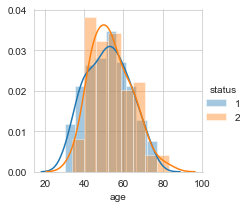

In [56]:
sns.FacetGrid(hb, hue='status').map(sns.distplot, 'age').add_legend()
plt.show()

age is also not separating class 1 and 2

# univariate analysis 
for feature nodes

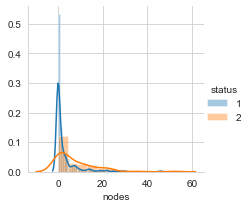

In [57]:
sns.FacetGrid(hb, hue='status').map(sns.distplot, 'nodes').add_legend()
plt.show()

nodes shows that people with less number of nodes of class 1. people with nodes increasing of class 2 

# CDF,PDF for age

In [58]:
counts, bin_edges = np.histogram(hb['age'],
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


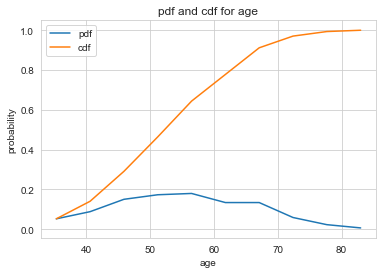

In [59]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel('age')
plt.ylabel('probability')
plt.title('pdf and cdf for age')
plt.legend()
plt.show()

peolpe with age below 65 lie within 80 percent

# CDF,PDF for year

In [60]:
counts, bin_edges = np.histogram(hb['year'],
                                        density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


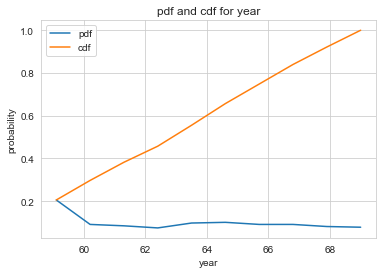

In [61]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel('year')
plt.ylabel('probability')
plt.title('pdf and cdf for year')
plt.legend()
plt.show()

# CDF,PDF for nodes

In [62]:
counts, bin_edges = np.histogram(hb['nodes'],
                                        density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


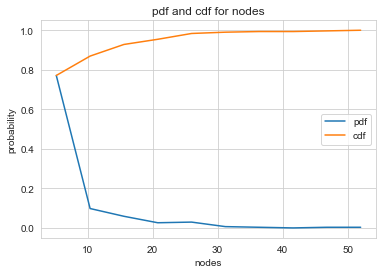

In [63]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.title('pdf and cdf for nodes')
plt.legend()
plt.show()

peolpe with large numbrs of nodes occur high

# Boxplots

## for year

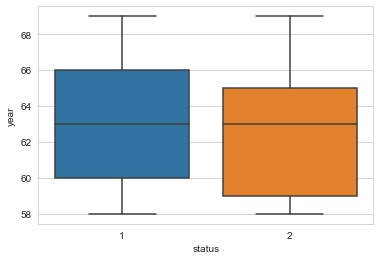

In [64]:
sns.boxplot(x='status',y='year', data=hb)
plt.show()

75 percentile and max value have large difference for class 2

## for age

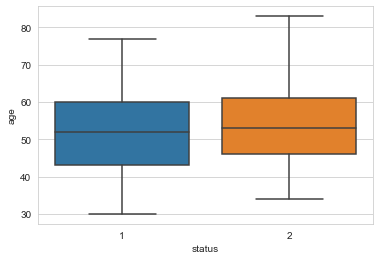

In [65]:
sns.boxplot(x='status',y='age', data=hb)
plt.show()

## for nodes

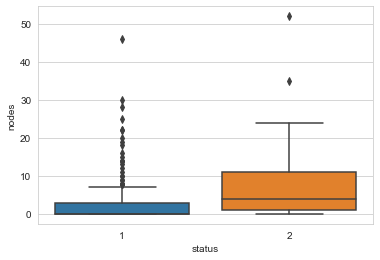

In [66]:
sns.boxplot(x='status',y='nodes', data=hb)
plt.show()

more outliers are occur in class 1 at maximum than 2

# violinplot

## for year

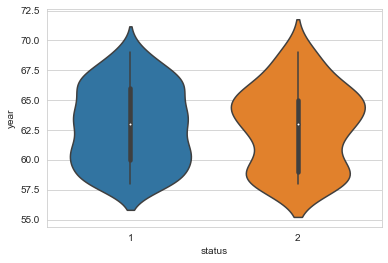

In [67]:
sns.violinplot(x="status", y="year", data=hb, size=8)
plt.show()

gives distribution of data, clas 1 is distributed over all year 

## for age

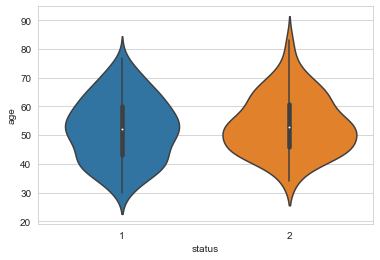

In [68]:
sns.violinplot(x="status", y="age", data=hb, size=8)
plt.show()

middle age people survived less than others

## for nodes

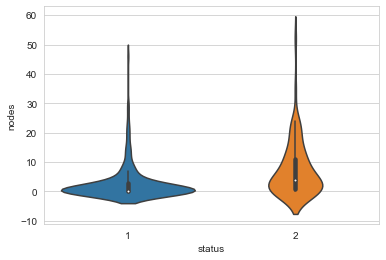

In [69]:
sns.violinplot(x="status", y="nodes", data=hb, size=8)
plt.show()

node at 1 is more distribted at less value

# pairplot

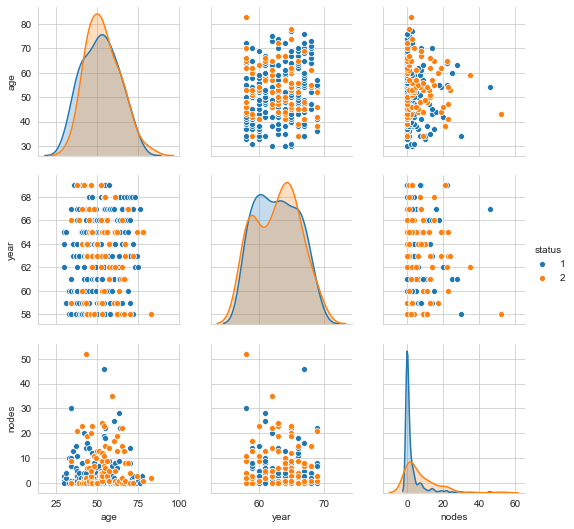

In [70]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb,hue='status',vars=['age','year','nodes'])
plt.show()

year and age are similar and every year has similar patients of 1 and 2 irrespective age. age and nodes show people at age 50 has more nodes and not clear to distinguish. 